# Title

# Lib Import

In [63]:
import warnings
warnings.filterwarnings('ignore')

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
plt.style.use('seaborn')

In [64]:
import streamlit as st


st.write(
'''
# Hello World
'''
)

# Data Collection

In [3]:
youtube_path = '../data/US_youtube_trending_data.csv'

youtube = pd.read_csv(youtube_path)

df = pd.DataFrame(youtube)

## todos

In [4]:
# add api

In [5]:
# add json russia data

In [6]:
# add csv brazil data 

# Data Processing 

## Clean 

In [8]:
# inspect data
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


In [61]:
# add missing category str column
df['category'] = ''

In [62]:
# loop through category columnn, map int ids to str values, calc totals

cat_list = ['Film & Animation', 'Autos & Vehicles', 'Music', 'Pets & Animals', 
             'Sports', 'Travel & Events', 'Gaming', 'People & Blogs', 'Comedy', 
             'Entertainment', 'News & Politics', 'Howto & Style', 'Education', 
             'Science & Technology', 'Nonprofits & Activism']

for i,cat in enumerate(df.iterrows()):
    if cat[1].categoryId == 2:
        df.loc[i,'category'] = cat_list[0]
    elif cat[1].categoryId == 1:
        df.loc[i,'category'] = cat_list[1]
    elif cat[1].categoryId == 10:
        df.loc[i,'category'] = cat_list[2]
    elif cat[1].categoryId == 15:
        df.loc[i,'category'] = cat_list[3]
    elif cat[1].categoryId == 17:
        df.loc[i,'category'] = cat_list[4]
    elif cat[1].categoryId == 19:
        df.loc[i,'category'] = cat_list[5]
    elif cat[1].categoryId == 20:
        df.loc[i,'category'] = cat_list[6]
    elif cat[1].categoryId == 22:
        df.loc[i,'category'] = cat_list[7]
    elif cat[1].categoryId == 23:
        df.loc[i,'category'] = cat_list[8]
    elif cat[1].categoryId == 24:
        df.loc[i,'category'] = cat_list[9]
    elif cat[1].categoryId == 25:
        df.loc[i,'category'] = cat_list[10]
    elif cat[1].categoryId == 26:
        df.loc[i,'category'] = cat_list[11]
    elif cat[1].categoryId == 27:
        df.loc[i,'category'] = cat_list[12]
        
    elif cat[1].categoryId == 28:
        df.loc[i,'category'] = cat_list[13]
    elif cat[1].categoryId == 29:
        df.loc[i,'category'] = cat_list[14]

df.category.value_counts()

Music                    10425
Entertainment            10202
Gaming                    6429
Sports                    5772
People & Blogs            4299
Comedy                    2895
Science & Technology      2111
Howto & Style             2110
News & Politics           2058
Autos & Vehicles          1956
Education                 1076
Film & Animation           929
Pets & Animals             310
Travel & Events            188
Nonprofits & Activism       31
Name: category, dtype: int64

In [11]:
# reorder category column, place left of categoryId

def move_column(df, cols_to_move=[], ref_col='', place='After'):
    
    cols = df.columns.tolist()
    if place == 'After':
        seg1 = cols[:list(cols).index(ref_col) + 1]
        seg2 = cols_to_move
    if place == 'Before':
        seg1 = cols[:list(cols).index(ref_col)]
        seg2 = cols_to_move + [ref_col]
    
    seg1 = [i for i in seg1 if i not in seg2]
    seg3 = [i for i in cols if i not in seg1 + seg2]
    
    return(df[seg1 + seg2 + seg3])

df = move_column(df,
                 cols_to_move=['category'],
                 ref_col='publishedAt',
                 place='After')
df.head()

,video_id,title,publishedAt,category,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,People & Blogs,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,Gaming,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,Entertainment,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,Music,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,Howto & Style,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


In [12]:
#isolate date 
for i, row in enumerate(df.publishedAt):
    df.loc[i, 'publishedAt'] = row[:10]
    
for i, row in enumerate(df.trending_date):
    df.loc[i, 'trending_date'] = row[:10]

In [13]:
# p is for published 
# t = trending 

#split in order to analyze y-y, m-m, and d-d changes 

# Split review dates by year, month and day (strings)
time_split = df.publishedAt.str.split('-', n=2, expand=True)
df['p_year'] = time_split[0]
df['p_month'] = time_split[1]
df['p_day'] = time_split[2]

# Convert review dates into a datetime object
dates = df.publishedAt
df.publishedAt = [d.date() for d in pd.to_datetime(dates)]

# Extract month and year from review dates
df['p_month_year'] = pd.to_datetime(df['publishedAt']).dt.to_period('M')

# Split review dates by year, month and day (strings)
time_split = df.trending_date.str.split('-', n=2, expand=True)
df['t_year'] = time_split[0]
df['t_month'] = time_split[1]
df['t_day'] = time_split[2]

# Convert review dates into a datetime object
dates = df.trending_date
df.trending_date = [d.date() for d in pd.to_datetime(dates)]

# Extract month and year from review dates
df['t_month_year'] = pd.to_datetime(df['trending_date']).dt.to_period('M')

In [14]:
df.head()


df.ratings_disabled.value_counts()

False    50463
True       328
Name: ratings_disabled, dtype: int64

In [15]:
df1=df.copy()

df1 = df1[(df1.ratings_disabled == False) & (df1.comments_disabled == False)]

df1=df1.drop(['video_id','channelId','categoryId','thumbnail_link','comments_disabled','ratings_disabled','description'], axis=1)

df1.head()

,title,publishedAt,category,channelTitle,trending_date,tags,view_count,likes,dislikes,comment_count,p_year,p_month,p_day,p_month_year,t_year,t_month,t_day,t_month_year
0,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11,People & Blogs,Brawadis,2020-08-12,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,2020,08,11,2020-08,2020,08,12,2020-08
1,Apex Legends | Stories from the Outlands – “Th...,2020-08-11,Gaming,Apex Legends,2020-08-12,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,2020,08,11,2020-08,2020,08,12,2020-08
2,I left youtube for a month and THIS is what ha...,2020-08-11,Entertainment,jacksepticeye,2020-08-12,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,2020,08,11,2020-08,2020,08,12,2020-08
3,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11,Music,XXL,2020-08-12,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,2020,08,11,2020-08,2020,08,12,2020-08
4,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11,Howto & Style,Mr. Kate,2020-08-12,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,2020,08,11,2020-08,2020,08,12,2020-08


In [16]:
# Empirical cumulative distribution functions
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

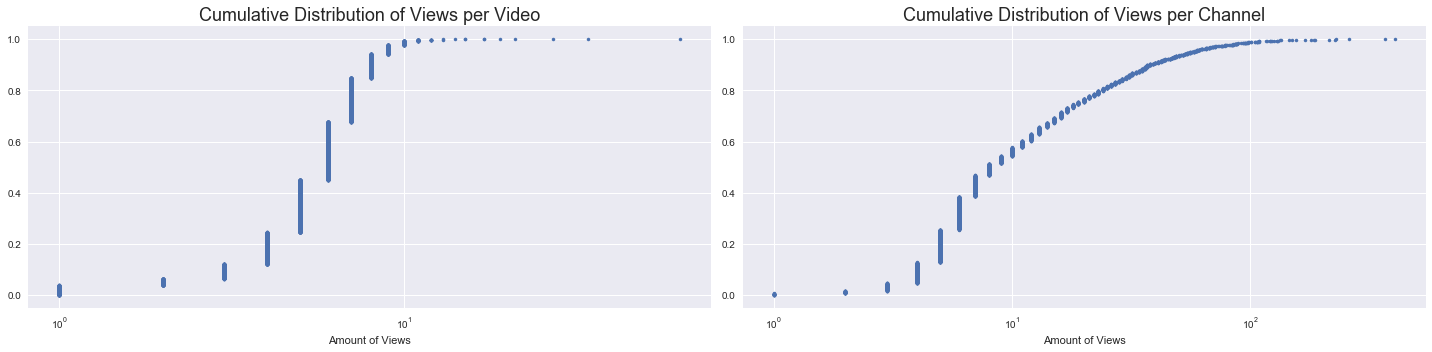

In [17]:
plt.figure(figsize=(20,5))

# Plot cumulative distribution of views per video
x, y = ecdf(df1.groupby('title').view_count.count())

ax2 = plt.subplot(1,2,1)
ax2.set_xlabel('Amount of Views')
ax2.plot(x, y, marker='.', linestyle='none')
ax2.set_xscale('log');
ax2.set_title('Cumulative Distribution of Views per Video', fontsize=18)


# Plot cumulative distribution of ratings per user
x, y = ecdf(df1.groupby('channelTitle').view_count.count())

ax3 = plt.subplot(1,2,2)
ax3.set_xlabel('Amount of Views')
ax3.plot(x, y, marker='.', linestyle='none')
ax3.set_xscale('log');
ax3.set_title('Cumulative Distribution of Views per Channel', fontsize=18)

sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

In [18]:
# todo, each bar needs different color 

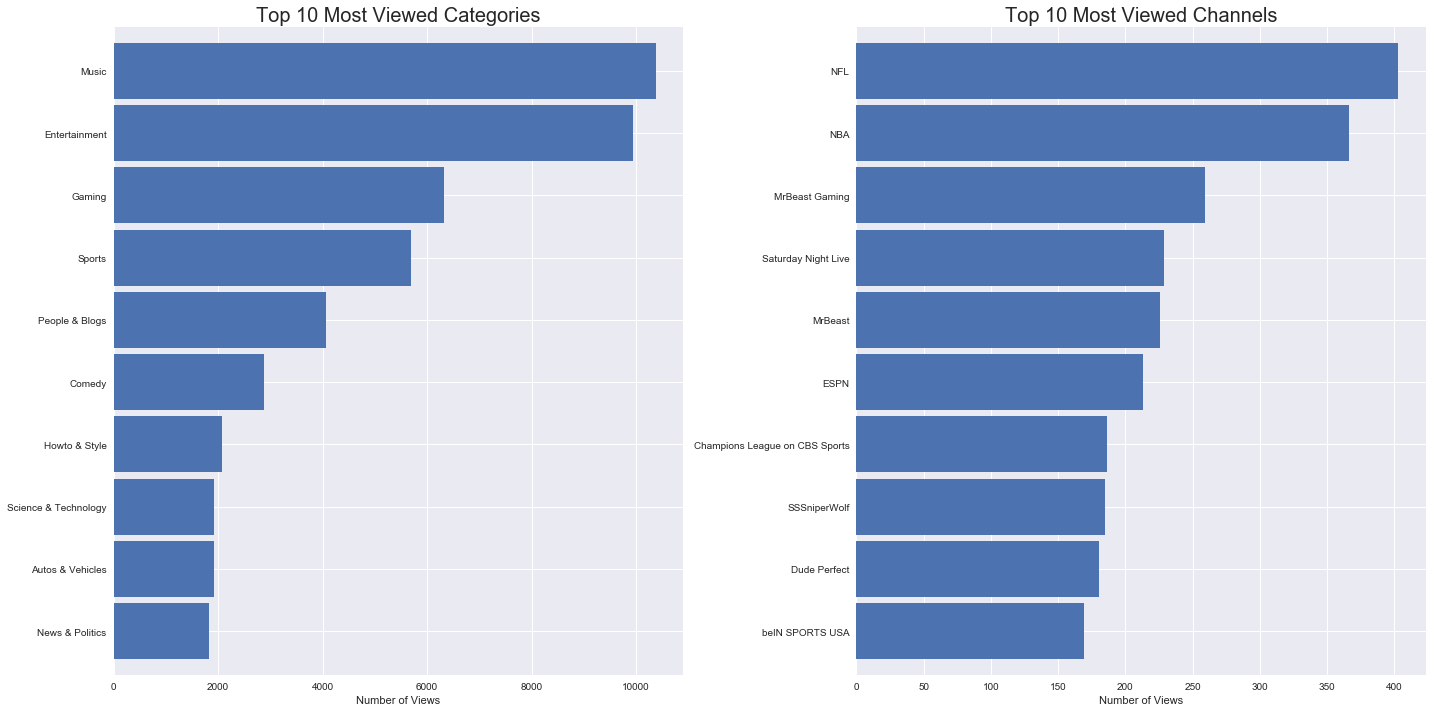

In [19]:
plt.figure(figsize=(20,10))

# Plot 10 most viewed categories
ax1 = plt.subplot(1,2,1)
df1.category.value_counts()[:10].sort_values().plot(kind='barh', width=0.9, ax=ax1)
ax1.set_xlabel('Number of Views')
ax1.set_title('Top 10 Most Viewed Categories', fontsize=20)

# Plot 10 most viewed channels 
ax2 = plt.subplot(1,2,2)
df1.channelTitle.value_counts()[:10].sort_values().plot(kind='barh', width=0.9, ax=ax2)
ax2.set_xlabel('Number of Views')
ax2.set_title('Top 10 Most Viewed Channels', fontsize=20)



sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

In [20]:
# # Plot 10 most viewed videos
# ax3 = plt.subplot(1,3,3)
# df1.title.value_counts()[:10].sort_values().plot(kind='barh', width=0.9, ax=ax2)
# ax3.set_xlabel('Number of Views')
# ax3.set_title('Top 10 Most Viewed Videos', fontsize=20)

## Visualization

In [59]:
# df1.title.value_counts()

### fig 1

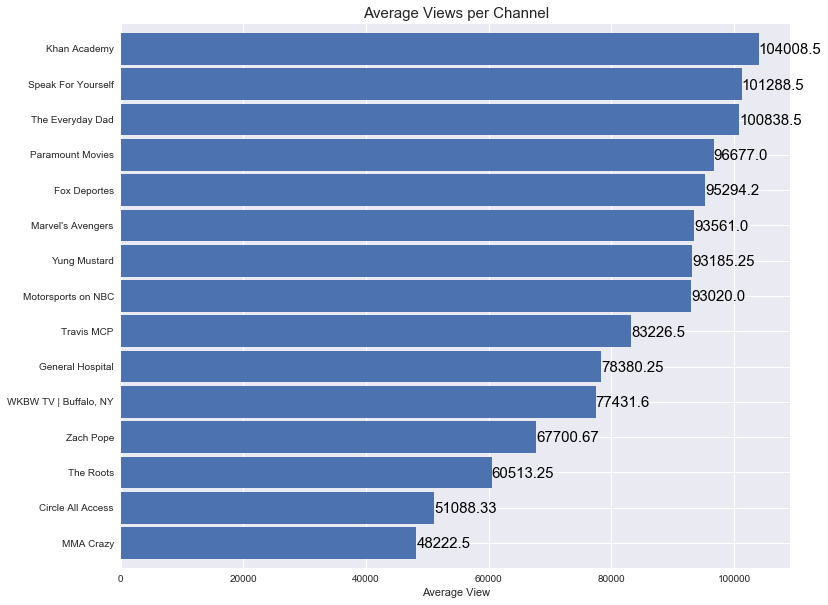

In [58]:
plt.figure(figsize=(12,10))

# Plot average rating by product category
ax = df1.groupby('channelTitle').view_count.mean().sort_values()[:15].plot.barh(width=0.9)
ax.set_title('Average Views per Channel', fontsize=15)
ax.set_ylabel('')
ax.set_xlabel('Average View')
sns.despine(top=True, right=True)

# Create a list to collect the plt.patches data
totals = []

# Find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# Set individual bar lables using above list
total = sum(totals)

# Set individual bar lables using above list
for i in ax.patches:
    # Get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()-0.5, i.get_y()+.3, \
            str(round((i.get_width()), 2)), fontsize=15,
color='black')

plt.show()

### fig 2

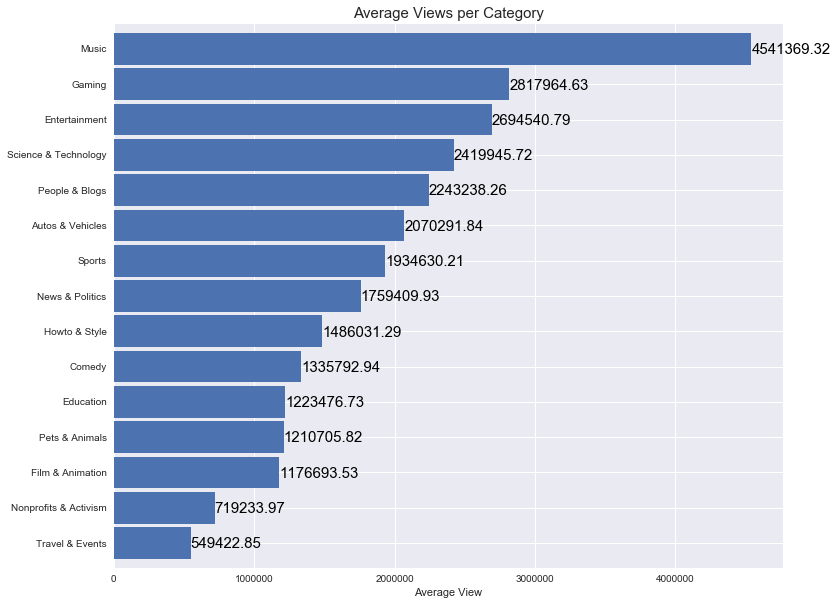

In [23]:
plt.figure(figsize=(12,10))

# Plot average rating by product category
ax = df1.groupby('category').view_count.mean().sort_values().plot.barh(width=0.9)
ax.set_title('Average Views per Category', fontsize=15)
ax.set_ylabel('')
ax.set_xlabel('Average View')
sns.despine(top=True, right=True)

# Create a list to collect the plt.patches data
totals = []

# Find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# Set individual bar lables using above list
total = sum(totals)

# Set individual bar lables using above list
for i in ax.patches:
    # Get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()-0.5, i.get_y()+.3, \
            str(round((i.get_width()), 2)), fontsize=15,
color='black')

plt.show()

### fig 3

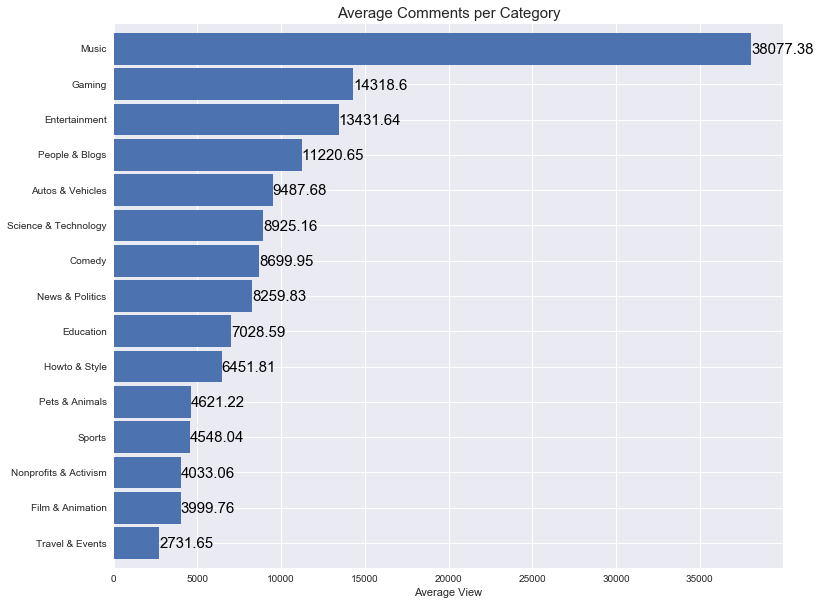

In [57]:
plt.figure(figsize=(12,10))

# Plot average rating by product category
ax = df1.groupby('category').comment_count.mean().sort_values().plot.barh(width=0.9)
ax.set_title('Average Comments per Category', fontsize=15)
ax.set_ylabel('')
ax.set_xlabel('Average View')
sns.despine(top=True, right=True)

# Create a list to collect the plt.patches data
totals = []

# Find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# Set individual bar lables using above list
total = sum(totals)

# Set individual bar lables using above list
for i in ax.patches:
    # Get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()-0.5, i.get_y()+.3, \
            str(round((i.get_width()), 2)), fontsize=15,
color='black')

plt.show()

### fig 4

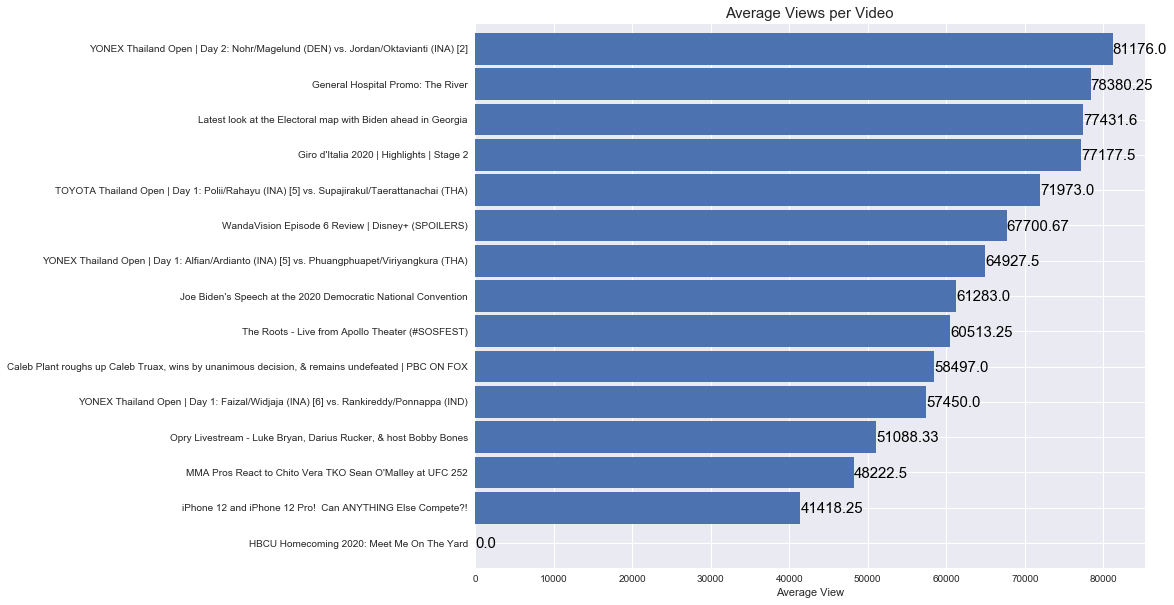

In [56]:
# add colors fo each colors
plt.figure(figsize=(12,10))

# Plot average views per title
ax = df1.groupby('title').view_count.mean().sort_values()[:15].plot.barh(width=0.9)
ax.set_title('Average Views per Video', fontsize=15)
ax.set_ylabel('')
ax.set_xlabel('Average View')
sns.despine(top=True, right=True)

# Create a list to collect the plt.patches data
totals = []

# Find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# Set individual bar lables using above list
total = sum(totals)

# Set individual bar lables using above list
for i in ax.patches:
    # Get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()-0.5, i.get_y()+.3, \
            str(round((i.get_width()), 2)), fontsize=15,
color='black')

plt.show()

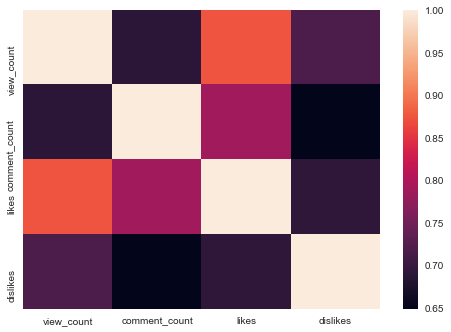

In [35]:
# how to numbers in a heatmap sns 
#all have positive 
# view counts are most correlated with likes
correlation = df1[['view_count', 'comment_count', 'likes', 'dislikes']].corr()
sns.heatmap(correlation)

In [39]:
# review how to incorporate title

# for i, cat in enumerate(cat_list):
#     correlation = df1[df1.category == cat][['view_count', 'comment_count', 'likes', 'dislikes']].corr()
#     sns.heatmap(correlation)
#     plt.show()

In [43]:

grouped = df1.groupby(['category']).sum()

# stacked bar graph by category to show

grouped.T.reset_index()

category,index,Autos & Vehicles,Comedy,Education,Entertainment,Film & Animation,Gaming,Howto & Style,Music,News & Politics,Nonprofits & Activism,People & Blogs,Pets & Animals,Science & Technology,Sports,Travel & Events
0,view_count,3983241498,3855098422,1295661862,26764873651,1082558049,17834898147,3070140653,47112165347,3205644889,22296253,9100817639,365633159,4665655354,11025457552,103291496
1,likes,198526768,302109662,82006399,1533255527,42131081,940483979,143535742,3227779289,44152097,1020704,562003429,17105639,199833967,242730608,4462444
2,dislikes,3472645,3923309,1764447,28224595,749801,18846928,5369448,70936243,5825309,13406,18019058,242946,4131143,7735672,118563
3,comment_count,18254295,25108054,7443277,133416492,3679776,90622447,13329434,395014778,15049404,125025,45522168,1395609,17207712,25919297,513550


In [53]:
# create line graph 
#x
p_grouped


,p_month_year,view_count,likes,dislikes,comment_count
0,2020-08,2.964428e+06,194979.861615,6859.860751,27485.216753
1,2020-09,2.420031e+06,144988.314334,3173.893345,16406.327133
2,2020-10,2.829594e+06,164859.329724,3149.344755,15422.228544
3,2020-11,2.806757e+06,166382.364801,3351.703411,20818.233088
4,2020-12,2.664243e+06,140793.396082,3218.218286,12620.282612
5,2021-01,2.776021e+06,147232.344493,3408.392194,13386.865221
6,2021-02,2.421920e+06,126669.690248,2392.515650,11805.925276
7,2021-03,2.639402e+06,141896.653866,3110.001029,13089.785873
8,2021-04,2.818505e+06,150967.453059,2569.383232,15686.699440


TypeError: float() argument must be a string or a number, not 'Period'

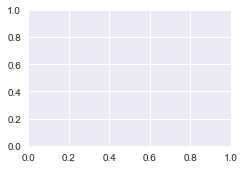

In [52]:
# TypeError: float() argument must be a string or a number, not 'Period'
#

p_grouped = df1.groupby('p_month_year').mean().reset_index()
t_grouped = df1.groupby('t_month_year').mean().reset_index()

plt.figure()

ax1 = plt.subplot(2,2,1)
ax1.plot('p_month_year', 'view_count', data=p_grouped, linewidth=2)
ax1.plot('t_month_year', 'view_count', data=p_grouped, linewidth=2)

ax2 = plt.subplot(2,2,2)
ax2.plot('p_month_year', 'comment_count', data=p_grouped, linewidth=2)
ax2.plot('t_month_year', 'comment_count', data=p_grouped, linewidth=2)

ax3 = plt.subplot(2,2,3)
ax3.plot('p_month_year', 'likes', data=p_grouped, linewidth=2)
ax3.plot('t_month_year', 'likes', data=p_grouped, linewidth=2)

ax4 = plt.subplot(2,2,4)
ax4.plot('p_month_year', 'dislikes', data=p_grouped, linewidth=2)
ax4.plot('t_month_year', 'dislikes', data=p_grouped, linewidth=2)

plt.show()

In [49]:
# show the change in average views/counts/l/d for published and trending  

df1.groupby('p_month_year').mean().reset_index()
df1.groupby('t_month_year').mean().reset_index()


,t_month_year,view_count,likes,dislikes,comment_count
0,2020-08,2.893934e+06,188971.393769,6378.621297,27073.337079
1,2020-09,2.408243e+06,150180.714652,3858.051742,18276.582821
2,2020-10,2.713230e+06,162081.140048,3040.285739,15368.525992
3,2020-11,2.955741e+06,171491.482765,3532.834506,20072.692754
4,2020-12,2.712662e+06,144798.738445,2926.522059,13322.121499
5,2021-01,2.680059e+06,144644.009663,3600.245252,13490.564145
6,2021-02,2.584020e+06,130112.255323,2673.383270,11935.473764
7,2021-03,2.536395e+06,140134.236647,2796.525418,12767.414254
8,2021-04,2.875384e+06,148946.116288,2820.515532,15200.483274


In [46]:
df1.head()

,title,publishedAt,category,channelTitle,trending_date,tags,view_count,likes,dislikes,comment_count,p_year,p_month,p_day,p_month_year,t_year,t_month,t_day,t_month_year
0,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11,People & Blogs,Brawadis,2020-08-12,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,2020,08,11,2020-08,2020,08,12,2020-08
1,Apex Legends | Stories from the Outlands – “Th...,2020-08-11,Gaming,Apex Legends,2020-08-12,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,2020,08,11,2020-08,2020,08,12,2020-08
2,I left youtube for a month and THIS is what ha...,2020-08-11,Entertainment,jacksepticeye,2020-08-12,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,2020,08,11,2020-08,2020,08,12,2020-08
3,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11,Music,XXL,2020-08-12,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,2020,08,11,2020-08,2020,08,12,2020-08
4,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11,Howto & Style,Mr. Kate,2020-08-12,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,2020,08,11,2020-08,2020,08,12,2020-08


In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49518 entries, 0 to 50790
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype    
---  ------         --------------  -----    
 0   title          49518 non-null  object   
 1   publishedAt    49518 non-null  object   
 2   category       49518 non-null  object   
 3   channelTitle   49518 non-null  object   
 4   trending_date  49518 non-null  object   
 5   tags           49518 non-null  object   
 6   view_count     49518 non-null  int64    
 7   likes          49518 non-null  int64    
 8   dislikes       49518 non-null  int64    
 9   comment_count  49518 non-null  int64    
 10  p_year         49518 non-null  object   
 11  p_month        49518 non-null  object   
 12  p_day          49518 non-null  object   
 13  p_month_year   49518 non-null  period[M]
 14  t_year         49518 non-null  object   
 15  t_month        49518 non-null  object   
 16  t_day          49518 non-null  object   
 17  t_month_year

In [26]:
# df.tags.value_counts()
# adf.channelId.value_counts

In [ ]:
# 

In [54]:
# why are there dupe tags 
# look at individually each for 94, 77, 76, examine difference in view counts for videos 
df1.tags.value_counts()

[None]                                                                                                                                                                                                                                                                                                                                                                                                                                                                               6096
danny gonzalez|funny|commentary|comedy|react|reaction|reacting|awful|humor                                                                                                                                                                                                                                                                                                                                                                                                             94
BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄                     

In [55]:
# look at the difference from publsiuehd and trending views/likes ratio 

In [ ]:
#combine (sum) rows that have same title/channel/date 

counts / comment conunts, likes /dislikes 